# 04 - Decision Trees

The goal of this exercise is to to develop an understanding how to implement a decision tree.

<div class="alert alert-block alert-info">
To solve this notebook you need the knowledge from the previous notebook. If you have problems solving it, take another look at the last week's notebooks.
    
It's also recommended to read the chapter 7 of the book in advance.
</div>

**Task**: In this exercise, we use a popular dataset to predict, if a patient has a heart disease or not, depending on some medical measurements.

In [6]:
# Run this cell two import the following modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<h2 style="color:blue" align="left">Load and preprocess data</h2>

In the first step, we need to load the dataset. If your are interessted about the meaning of each feature, you can have a look at the description on the [UCI site](https://archive.ics.uci.edu/ml/datasets/statlog+(heart)) to this dataset.

In [7]:
dataset = pd.read_csv('dataset/heart.dat', delim_whitespace=True)
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


In [8]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    float64
 1   sex       270 non-null    float64
 2   cp        270 non-null    float64
 3   trestbps  270 non-null    float64
 4   chol      270 non-null    float64
 5   fbs       270 non-null    float64
 6   restecg   270 non-null    float64
 7   thalach   270 non-null    float64
 8   exang     270 non-null    float64
 9   oldpeak   270 non-null    float64
 10  slope     270 non-null    float64
 11  ca        270 non-null    float64
 12  thal      270 non-null    float64
 13  target    270 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 29.7 KB


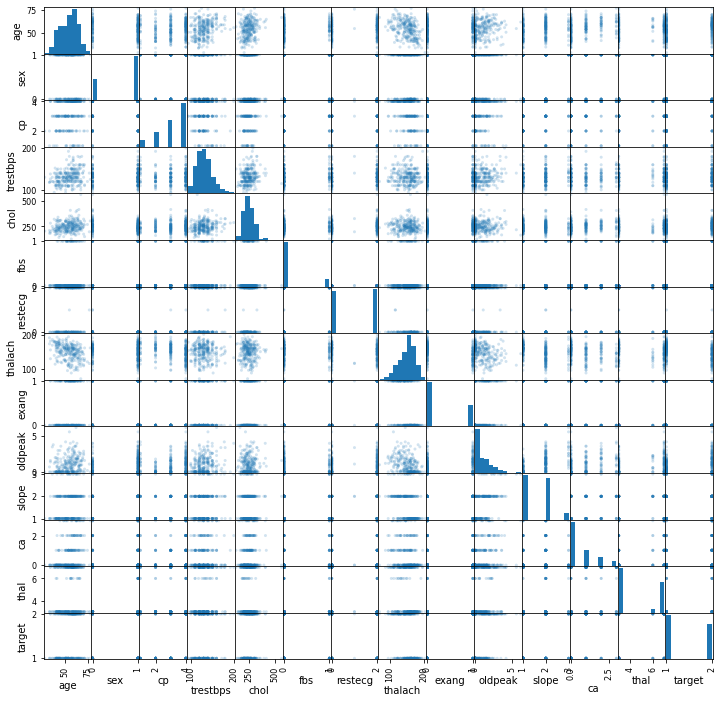

In [10]:
pd.plotting.scatter_matrix(dataset, alpha=0.2, figsize=(12,12));

The dataset is complete and has only numerical values, we can do the train-test-split.

In [11]:
from sklearn.model_selection import train_test_split
X = dataset.drop('target', axis=1)
y = dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=dataset['target'])
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((216, 13), (54, 13), (216,), (54,))

<div class="alert alert-block alert-info">
Decision trees and ensemble methods, like random forests, do not require feature scaling to be performed as they are not sensitive to the the variance in the data.
</div>

<h2 style="color:blue" align="left">Build and evaluate the tree</h2>

Now, that we have prepared the data, we can start to grow the tree. Therefore we use the built-in class `DecisionTreeClassifier` of scikit-learn.

In [12]:
from sklearn.tree import DecisionTreeClassifier

<div class="alert alert-block alert-success"><b>Task</b><br> 
Create an instance of a DecisionTreeClassifer and save it in the variable tree_clf. Then fit the model using the training data set. Set the parameter random_state to 42, to have comparable results.
</div>

In [13]:
tree_clf = None
# Write Your Code Here
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train);

You can use the function defined below to visualize the full grown tree.

In [14]:
from sklearn import tree
def plot_decision_tree(dec_tree, feature_names, class_names, filename=None):
    # Setting dpi = 300 to make image clearer than default
    # fig size depends on the size of the tree
    depth = dec_tree.tree_.max_depth
    fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (depth*2,depth*2), dpi=300)
    tree.plot_tree(dec_tree,
               feature_names = feature_names, 
               class_names=class_names,
               filled = True);
    if filename != None:
        fig.savefig(str(filename) + '.png')

<div class="alert alert-block alert-success"><b>Task</b><br> 
Use the function plot_decision_tree() to plot the tree you created in the previous task. If the output is too small, you can pass the function a filename as fourth parameter, to save the figure as png in the current directory.
</div>

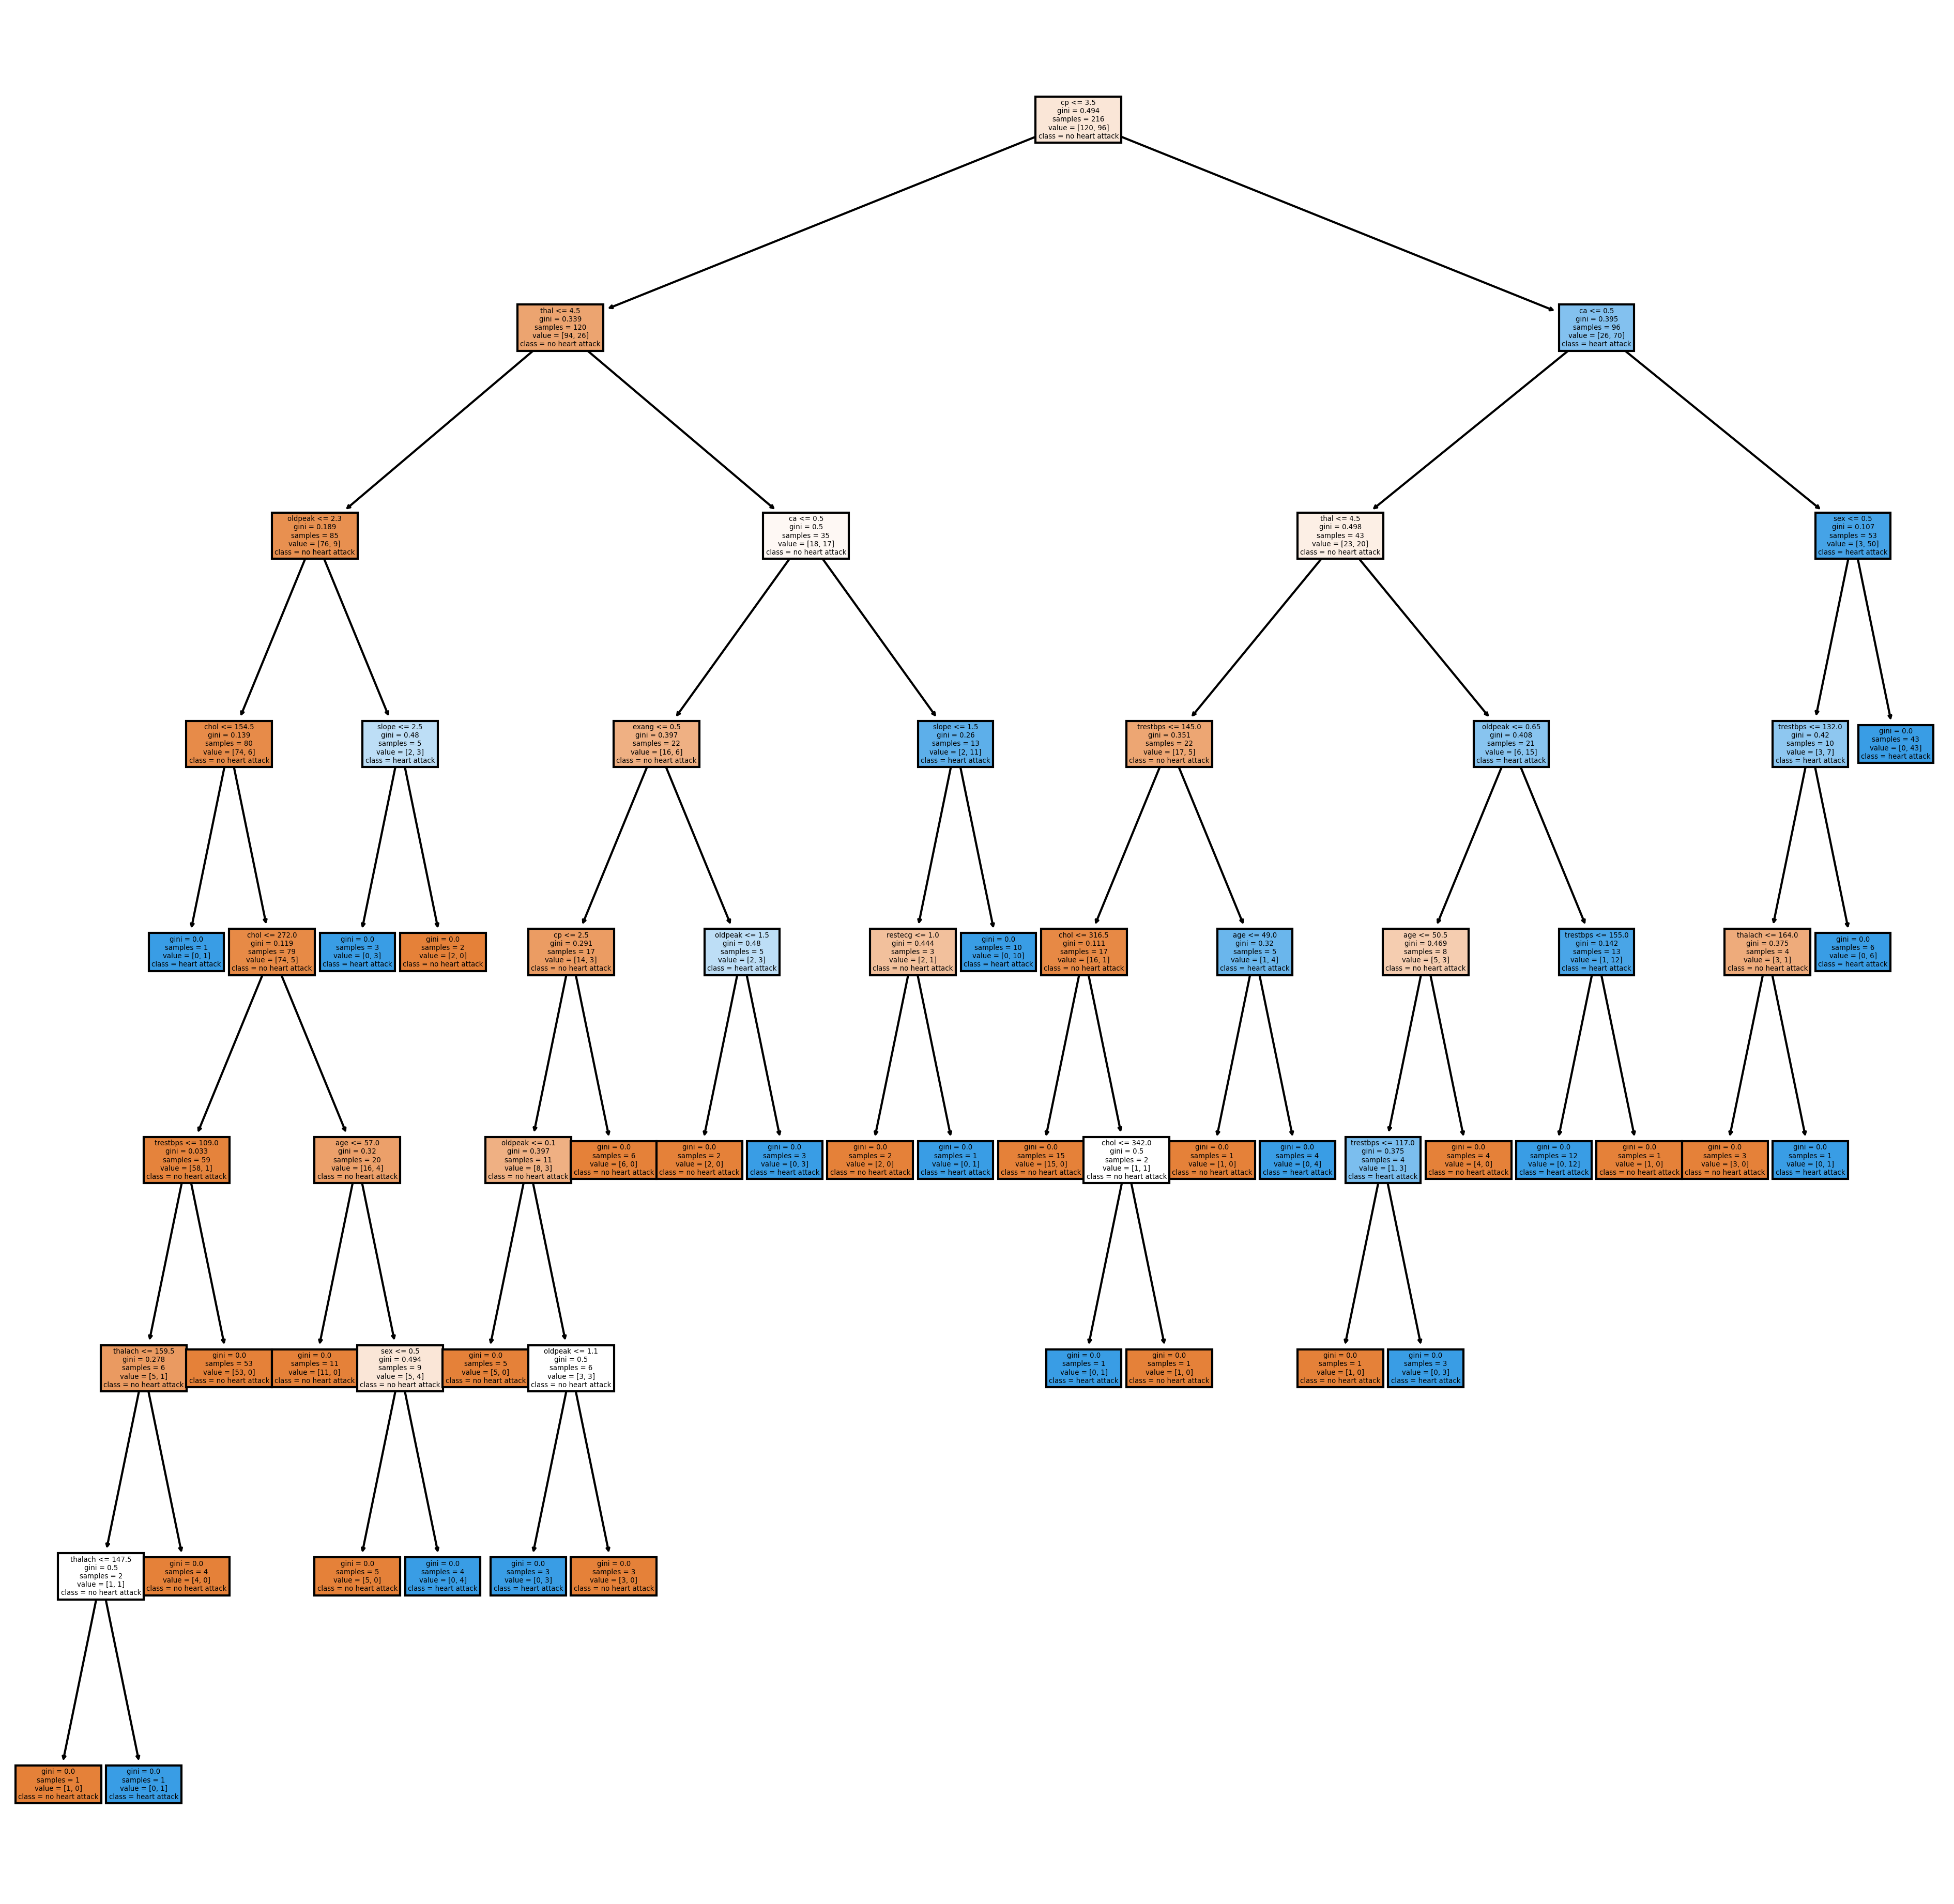

In [15]:
feature_names=X.columns
class_names=['no heart attack', 'heart attack']
# Write Your Code Here
plot_decision_tree(tree_clf, feature_names, class_names)

Wow, that's a big tree. You can see, it has a depth of 8. If you look at the root node, you can see, that the first decision is, if the cp value is smaller euqal 3.5 and so on. To evaluate the model, you can use the confusion matrix and the accuracy score.

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

<div class="alert alert-block alert-success"><b>Task</b><br> 
Use the metrics Confusion Matrix and Accuracy score to evalute the performance of your model. Evaluate the model with the training and the test set. How do you assess the results?
</div>

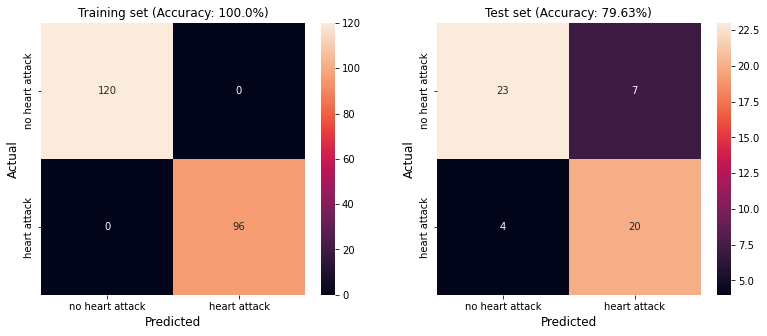

In [17]:
# Write Your Code Here
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,5))
# Training Set
y_train_pred = tree_clf.predict(X_train)
train_accuracy = accuracy_score(y_true=y_train, y_pred=y_train_pred)
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt="d", yticklabels=class_names, xticklabels=class_names, ax=ax1)
ax1.set_title(f'Training set (Accuracy: {round(train_accuracy*100, 2)}%)')
ax1.set_xlabel('Predicted', fontsize=12)
ax1.set_ylabel('Actual', fontsize=12);

# Test Set
y_test_pred = tree_clf.predict(X_test)
test_accuracy = accuracy_score(y_true=y_test, y_pred=y_test_pred)
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="d", yticklabels=class_names, xticklabels=class_names, ax=ax2)
ax2.set_title(f'Test set (Accuracy: {round(test_accuracy*100, 2)}%)')
ax2.set_xlabel('Predicted', fontsize=12)
ax2.set_ylabel('Actual', fontsize=12);

_Assess The Model Here_

→ On the training set, the model performs perfectly. It classifies all 120 sick patients and all 96 healthy patients correct. This leads to an accuracy of 100%.

On the test set, the model does not work so well. 7 healthy patients are incorrectly classified as sick and 4 sick patients are classified as healthy. This results in an overall accuracy of 79.63%. Due to the large difference between the accuracy values of the training set and the test set (more than 20 percentange points), one can assume that this model is overfitted. Therefore, the model must be regularized.

<h2 style="color:blue" align="left">Regularization</h2>

Especially if the model tends to overfitting, then the influence of max_depth and ccp_alpha should be examined.

### Max depth

Max_depth regulates the maximum depth of the tree.

<div class="alert alert-block alert-success"><b>Task</b><br> 
Use a for loop to create multiple trees with different depths. The values for max_depth to be examined are in the variable max_depths. Store the accuracy score of the training set and the test set in the variables provided. Then use the code in the next cell to visualize the results.
</div>

In [18]:
train_accuracies = []
test_accuracies = []
max_depths = range(1, tree_clf.tree_.max_depth+1)
# Write Your Code Here
for max_depth_ctr in max_depths:
    tree_clf_regularised = DecisionTreeClassifier(max_depth=max_depth_ctr, random_state=42)
    tree_clf_regularised.fit(X_train, y_train)
    # Training set
    y_train_pred = tree_clf_regularised.predict(X_train)
    train_accuracies.append(accuracy_score(y_pred=y_train_pred, y_true=y_train))
    # Test set
    y_test_pred = tree_clf_regularised.predict(X_test)
    test_accuracies.append(accuracy_score(y_pred=y_test_pred, y_true=y_test))

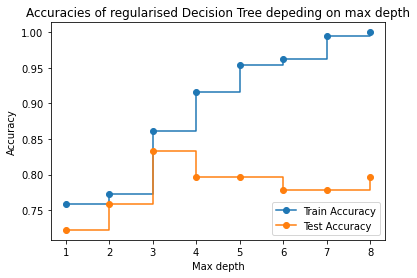

In [19]:
# Plot accuracies vs. max depth
plt.plot(max_depths, train_accuracies, marker='o', label='Train Accuracy', drawstyle='steps-post')
plt.plot(max_depths, test_accuracies, marker='o', label='Test Accuracy', drawstyle='steps-post')
plt.title('Accuracies of regularised Decision Tree depeding on max depth')
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
#plt.ylim([0,1])
#plt.axhline(y=1, color='black', linestyle='-')
plt.legend(loc='lower right');

The figure shows the influence of the maximum depth on the accuracy of the prediction, both on the training and on the test set. The training accuracy increases with increasing depth of the tree. The test accuracy, on the other hand, peaks at max_depth=3. From this value on, the accuracy on the test set drops again. So max_depth=3 can be the optimal hyperparameter regarding the accuracy.

The part above was an analyis of the influence of the max depth to the accuracy. To find the best max_depth for the dataset it is necessary to do cross validation. The test set should be apart from every until the best model is found. 

<div class="alert alert-block alert-success"><b>Task</b><br> 
Use a for loop to create multiple trees with different depths. Examine the result by using 3-fold cross validation. 
</div>

In [20]:
from sklearn.model_selection import GridSearchCV
# Write Your Code Here
params = {'max_depth': list(range(2, tree_clf.tree_.max_depth+1))}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8]}, verbose=1)

In [21]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=3, random_state=42)

In [22]:
y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.8333333333333334

### Pruning

Another way to regularize a tree is the parameter ccp_alpha. With this parameter you can control the use of pruning. The higher the ccp_alpha value, the more batches will be pruned. 

<div class="alert alert-block alert-success"><b>Task</b><br> 
Use a for loop to create multiple trees with different depths. The values for ccp_alpha to be examined are in the variable ccp_alphas. Store the accuracy score of the training set and the test set in the variables provided. Then use the code in the next cell to visualize the results.
</div>

In [23]:
train_accuracies = []
test_accuracies = []
ccp_alphas = np.linspace(0,0.1,11)
# Write Your Code Here
max_depth = max(max_depths)
for ccp_alpha in ccp_alphas:
    tree_clf_regularised = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=42)
    tree_clf_regularised.fit(X_train, y_train)
    # Training set
    y_train_pred = tree_clf_regularised.predict(X_train)
    train_accuracies.append(accuracy_score(y_pred=y_train_pred, y_true=y_train))
    # Test set
    y_test_pred = tree_clf_regularised.predict(X_test)
    test_accuracies.append(accuracy_score(y_pred=y_test_pred, y_true=y_test))

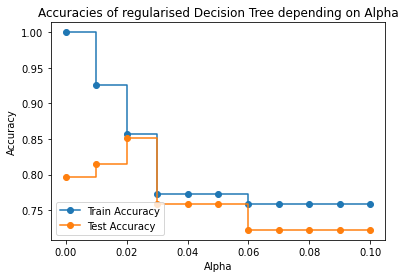

In [24]:
# Plot accuracies vs. Alpha
plt.plot(ccp_alphas, train_accuracies, marker='o', label="Train Accuracy", drawstyle="steps-post")
plt.plot(ccp_alphas, test_accuracies, marker='o', label="Test Accuracy", drawstyle="steps-post")
plt.title('Accuracies of regularised Decision Tree depending on Alpha')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
#plt.ylim([0,1])
plt.legend(loc='lower left');

As the alpha value increases, the tree becomes more regularized. This also leads to a decreasing training accuracy. However, the test accuracy increases up to a value of 0.02. From then on, the accuracy for both the training and the test set drops again.

The optimal value of ccp_alphas=0.02 gives an accuracy of 85% for the test set. This is more than the 83% accuracy for max_depth=3 in the step before. So for this dataset pruning works better. 

To avoid using the test set for finding the best hyperparameters it is better to use cross validation on the training set.

<div class="alert alert-block alert-success"><b>Task</b><br> 
Use 3-fold cross validation on the training set to find the best setting of the cc_alpha value. 
</div>

In [25]:
ccp_alphas = np.linspace(0,0.1,11)
params = {'ccp_alpha': list(np.linspace(0,0.1,11))}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 11 candidates, totalling 33 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'ccp_alpha': [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06,
                                       0.07, 0.08, 0.09, 0.1]},
             verbose=1)

In [26]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.02, random_state=42)

In [27]:
y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.8518518518518519

Now we compare the optimial pruned tree with the full tree from above.

<div class="alert alert-block alert-success"><b>Task</b><br> 
Use the optimal values of ccp_alpha to build the optimal model again and plot it. You will see a big difference to the complete tree. 
</div>

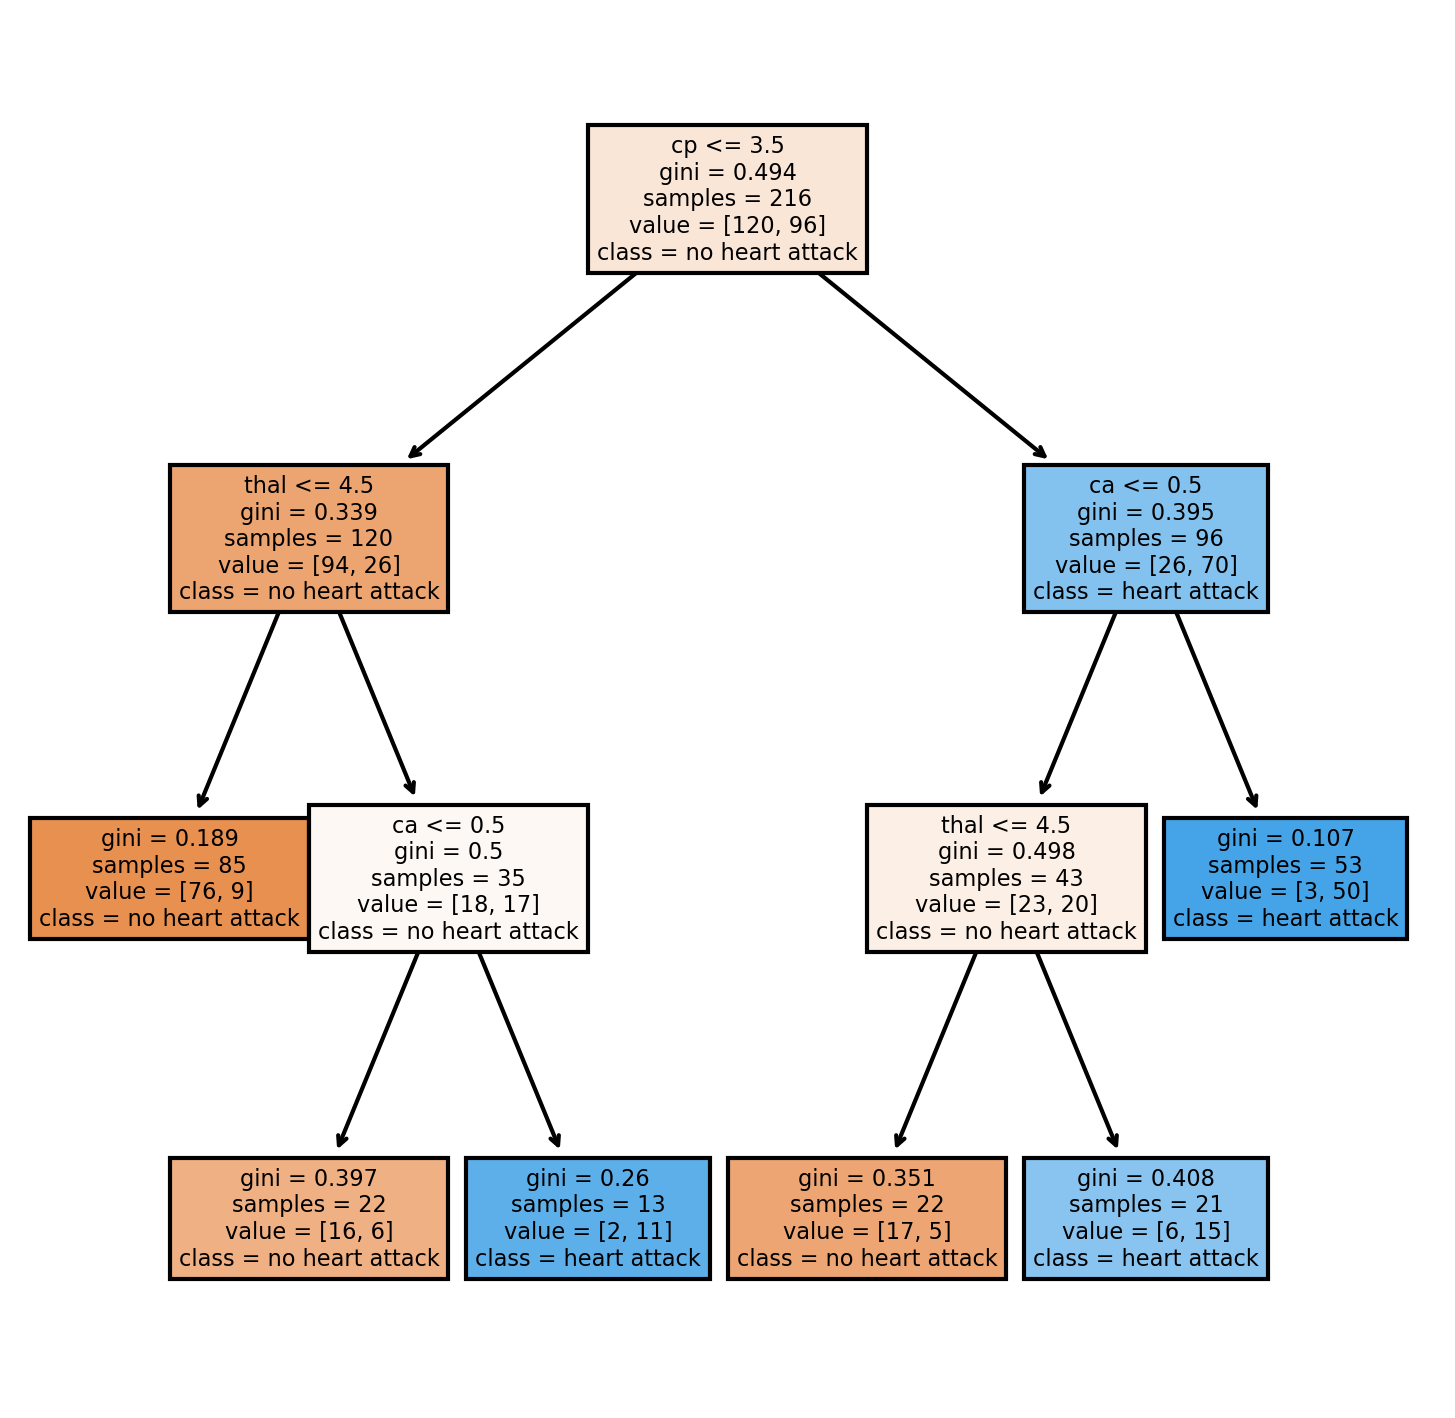

In [28]:
tree_clf_regularised = DecisionTreeClassifier(ccp_alpha=0.02, random_state=42)
tree_clf_regularised.fit(X_train, y_train)
plot_decision_tree(tree_clf_regularised, feature_names, class_names)

The tree is much smaller than the first one. 

## Further Hyperparameter Tuning
A further improvement is possible if we also optimize some further hyperparameter. 

<div class="alert alert-block alert-success"><b>Task</b><br> 
Fine-tune also the hyperparameters max_leaf_nodes and min_samples_split in combination with max_depth and ccp_alpha. Use Randomized Search for 100 combinations to shorten the computational afford in comparison to Grid Search. 
</div>

In [29]:
from sklearn.model_selection import RandomizedSearchCV

params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4], \
          'ccp_alpha': list(np.linspace(0,0.1,11)), 'max_depth': list(range(2, tree_clf.tree_.max_depth+1))}
rand_search_cv = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params, n_iter=100, verbose=1, cv=3)

rand_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'ccp_alpha': [0.0, 0.01, 0.02, 0.03,
                                                      0.04, 0.05, 0.06, 0.07,
                                                      0.08, 0.09, 0.1],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8],
                                        'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8,
                                                           9, 10, 11, 12, 13,
                                                           14, 15, 16, 17, 18,
                                                           19, 20, 21, 22, 23,
                                                           24, 25, 26, 27, 28,
                                                           29, 30, 31, ...],
                                        'min_samples_split': [2, 3, 4]},
                   verbose=1)

In [30]:
rand_search_cv.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.02, max_depth=7, max_leaf_nodes=35,
                       min_samples_split=4, random_state=42)

In [31]:
y_pred = rand_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.8518518518518519

In this example it is not possible to get a better result. It is same tree as before, the parameters max_depth, max_leaf_nodes and min_samples_split have no influence on the tree.  

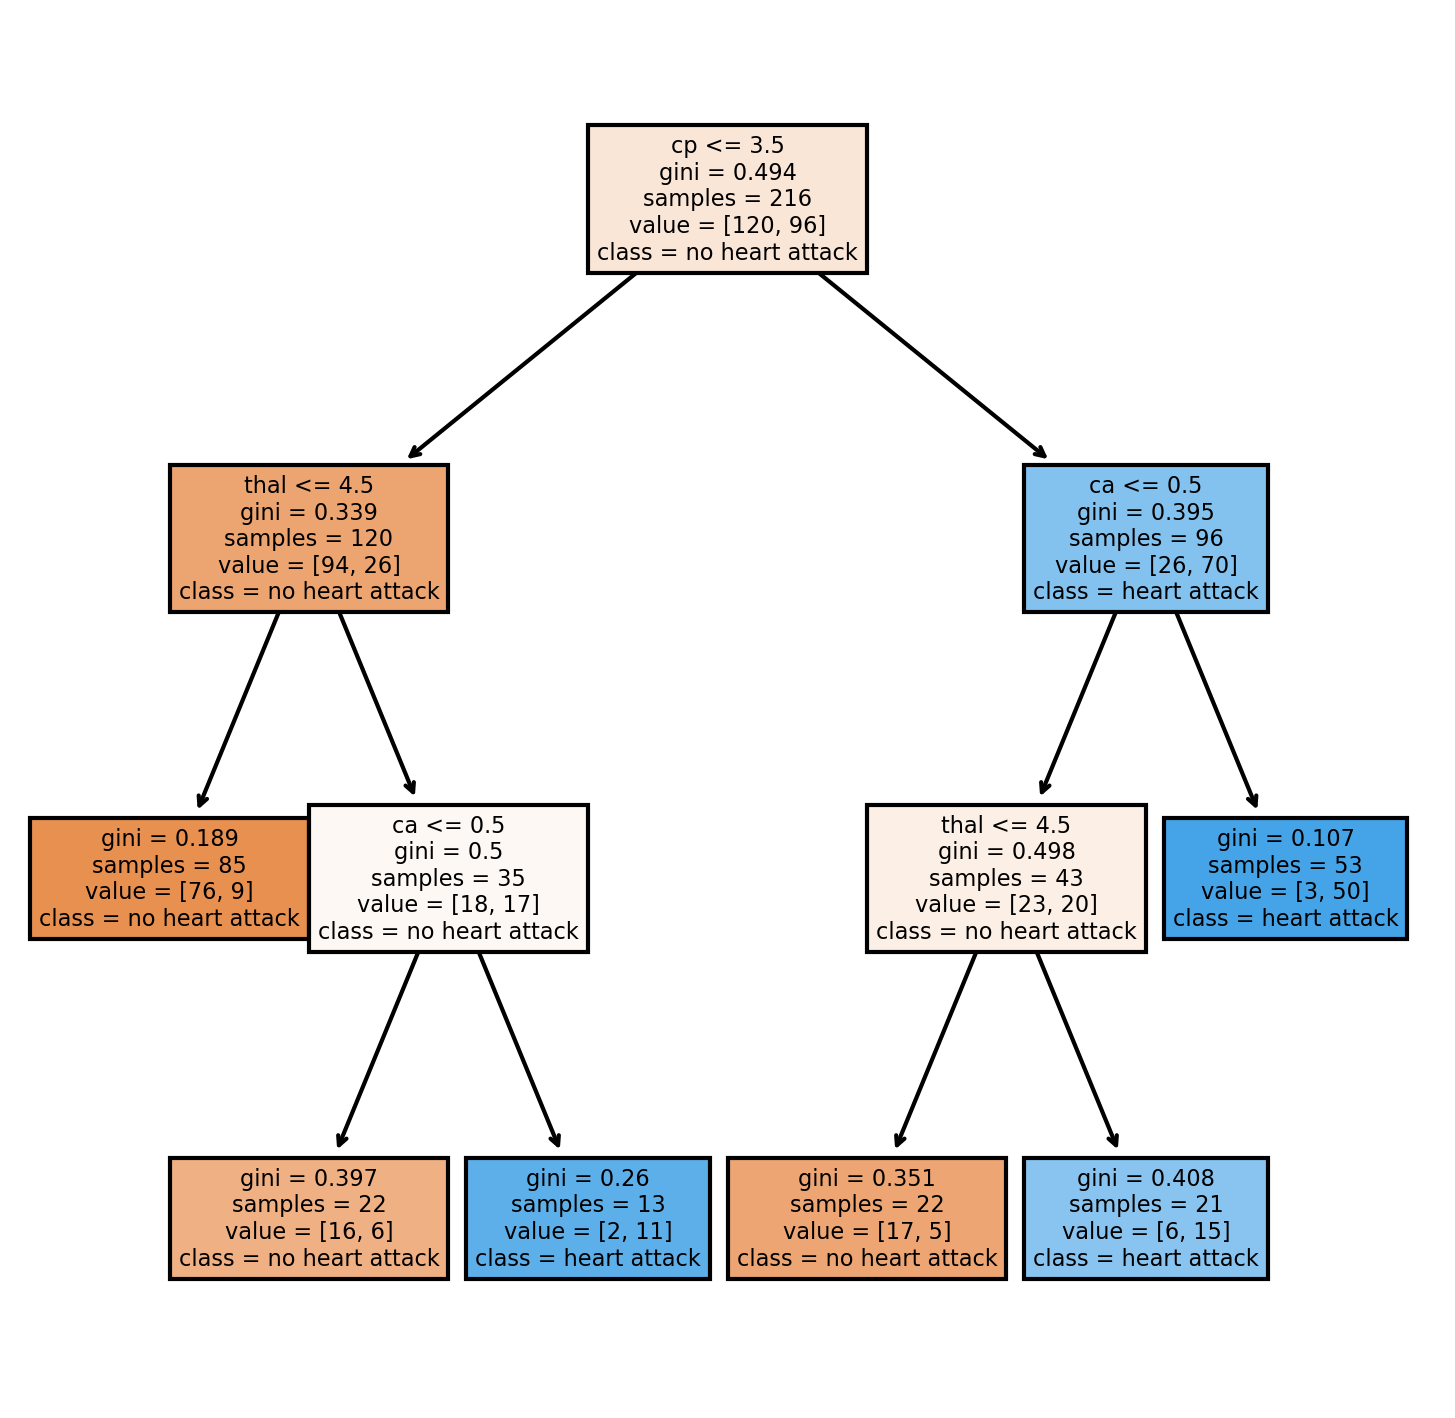

In [39]:
plot_decision_tree(rand_search_cv.best_estimator_, feature_names, class_names)